# Diffusion Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib.animation import FuncAnimation

In [2]:
@njit
def clip(x, n):
    return max(0,min(x, n - 1))

@njit
def DLA(n: int, density: float):
    space_list = []
    space = np.zeros((n,n), np.int8)
    space[np.random.randint(0,n), np.random.randint(0,n)] = 1

    d = 0
    c = 0
    while d < density:
        if c % 100 == 0:
            print(d)
        space_list.append(space.copy())
        i = np.random.randint(0,n)
        j = np.random.randint(0,n)

        if space[i, j] == 0:
            while True:
                if space[clip(i - 1, n), j]:
                    space[i, j] = 1
                    break
                elif space[clip(i + 1, n), j]:
                    space[i, j] = 1
                    break
                elif space[i, clip(j - 1, n)]:
                    space[i, j] = 1
                    break
                elif space[i, clip(j + 1, n)]:
                    space[i, j] = 1
                    break
                else:

                    if np.random.randint(0,2) == 0: # move i
                        if i == 0:
                            i += 1
                        elif i == n - 1:
                            i -= 1
                        else:
                            i += (np.random.randint(0,2) * 2) - 1
                    else: # move j
                        if j == 0:
                            j += 1
                        elif j == n - 1:
                            j -= 1
                        else:
                            j += (np.random.randint(0,2) * 2) - 1

        d = np.sum(space) / (n ** 2)
        c += 1

    return space_list

space_list = DLA(10, 0.2)

0.0


In [7]:
space_list = DLA(1_000,0.2)

0.0
0.000101
0.000201
0.000301
0.000401
0.000501
0.000601
0.000701
0.000801
0.000901
0.001001
0.001101
0.001201
0.001301
0.001401
0.001501
0.001601
0.001701
0.001801
0.001901
0.002001
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.003099
0.003199
0.003299
0.003398
0.003498
0.003597
0.003696
0.003796
0.003896
0.003996
0.004094
0.004194
0.004293
0.004393
0.004492
0.004592
0.00469
0.00479
0.004889
0.004988
0.005088
0.005187
0.005287
0.005387
0.005487
0.005587
0.005686
0.005785
0.005883
0.005983
0.006083
0.006183
0.006281
0.006381
0.00648
0.00658
0.00668
0.00678
0.006878
0.006976
0.007076
0.007176
0.007273
0.007372
0.007471
0.00757
0.00767
0.007769
0.007869
0.007969
0.008068
0.008165
0.008264
0.008363
0.008462
0.008561
0.008661
0.00876
0.008859
0.008957
0.009057
0.009157
0.009255
0.009354
0.009452
0.009552
0.009651
0.009751
0.009851
0.009951
0.01005
0.010149
0.010247
0.010346
0.010445
0.010542
0.010642
0.010741
0.010839
0.010937
0.011037
0.011137
0.011236
0.011334
0

In [4]:


#space_list = np.array(space_list)
#print("Total Frames: ",len(space_list))
interval_space_list = np.array(space_list[::len(space_list) // 1000])
print("Interval Frames: ",len(interval_space_list))

Interval Frames:  1016


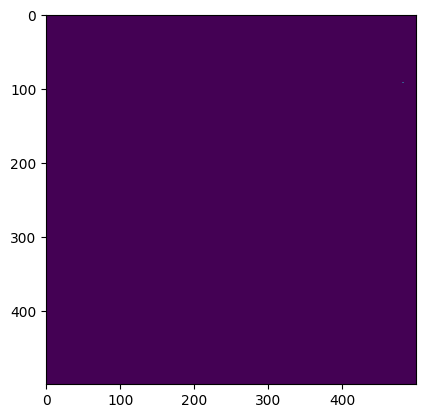

In [5]:
data = interval_space_list

fig, ax = plt.subplots()
im = ax.imshow(data[0, :, :], cmap='viridis')

def update(frame):
    im.set_array(data[frame, :, :])
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=data.shape[0], interval=1)

In [6]:
ani.save("test.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
n = 1_000

finals = [DLA(100,0.2)[-1] for _ in range(n)]

In [ ]:
# Stack the arrays along a new axis (axis=0)
stacked_arrays = np.stack(finals, axis=0)

# Compute the mean along the new axis
mean_array = np.mean(stacked_arrays, axis=0)

In [ ]:
plt.matshow(mean_array)